In [2]:
#%autosave 0
from IPython.core.display import HTML, display
display(HTML('<style>.container { width:100%; !important } </style>'))

# 2-3 Trees

In [3]:
import graphviz as gv

Ths notebook presents <a href="https://en.wikipedia.org/wiki/2-3_tree">2-3 trees</a>.  We define these trees inductively as follows:
  - $\texttt{Nil}$ is a 2-3 tree that represents the empty set.
  - $\texttt{Two}(l, k, r)$ is a 2-3 tree provided that
      - $l$ is a 2-3 tree,
      - $k$ is a key,
      - $r$ is a 2-3 tree,
      - all keys stored in $l$ are less than k and all keys stored in $r$ are bigger than $k$, that is we have
        $$ l < k < r. $$
      - $l$ and $r$ have the same height.
      A node of the form  $\texttt{Two}(l, k, r)$ is called a *2-node*.  Except for the fact
      that there is no value, a 2-node is
      interpreted in the same way as we have interpreted the term $\texttt{Node}(k, v, l, r)$.
  - $\texttt{Three}(l, k_l, m, k_r, r)$ is a 2-3 tree provided
      - $l$, $m$, and $r$ are 2-3 trees,
      - $k_l$ and $k_r$ are keys,
      - $l < k_l < m < k_r < r$,
      - $l$, $m$, and $r$ have the same height.
      A node of the form  $\texttt{Three}(l, k_l, m, k_r, r)$ is called a *3-node*. 

In order to keep 2-3 trees balanced when inserting new keys we use a fourth constructor of the form
$\texttt{Four}(l,k_1,m_l, k_2, m_r, k_3, r)$.
A term of the form $\texttt{Four}(l,k_1,m_l, k_2, m_r, k_3, r)$ is a *2-3-4 tree* iff
  - $l$, $m_l$, $m_r$, and $r$ are 2-3 trees,
  - $k_l$, $k_m$, and $k_r$ are keys,
  - $l < k_l < m_l < k_m < m_r < k_r < r$,
  - $l$, $m_l$, $m_r$, and $r$ all have the same height.
  
Nodes of this form are called *4-nodes* and the key $k_m$ is called the *middle key*.
Trees containing 2-nodes, 3-node, and 4-nodes are called *2-3-4 trees*.

In order to keep 2-3 trees balanced when deleting keys we use a fifth constructor of the form
$\texttt{One}(t)$.
A term of the form $\texttt{One}(t)$ is a *1-2-3 tree* iff $t$ is a 2-3 tree.

The class `TwoThreeTree` is a *superclass* for constructing the nodes of *2-3-4 trees*.  It has one static variable `sNodeCount`.  This variable is used to equip all nodes with a unique identifier.  This identifier is used to draw the trees using `graphviz`.

Every node has a uniques id `mID` that is stored as a member variable.  Furthermore, this class provides defaults for the functions `isNil`, `isTwo`, `isThree`, and `isFour`.  These functions can be used to check the type of a node.

In [4]:
class TwoThreeTree:
    sNodeCount = 0
    
    def __init__(self):
        TwoThreeTree.sNodeCount += 1
        self.mID = TwoThreeTree.sNodeCount
        
    def getID(self):
        return self.mID
        
    def isNil(self):
        return False
    
    def isOne(self):
        return False
    
    def isTwo(self):
        return False
    
    def isThree(self):
        return False
    
    def isFour(self):
        return False
    
    def isTree(self):
        return False
    
    def isMethod(self):
        return False
    
    def insert(self, k):
        return self._ins(k)._restore()._grow()
    
    def delete(self, k):
        return self._del(k)._repair()._shrink()
    
    def _grow(self):
        return self
    
    def _shrink(self):
        return self

The function `make_string` is a helper function used to shorten the implementation of `__str__`.
  - `obj` is the object that is to be rendered as a string
  - `attributes` is a list of those member variables that are used to produce the string

In [5]:
def _make_string(self, attributes):
        # map the function __str__ to all attributes and join them with a comma
        name = self.__class__.__name__
        return f"{name}({', '.join(map(str, [getattr(self, at) for at in attributes]))})"
    
TwoThreeTree._make_string = _make_string

The method $t.\texttt{toDot}()$ takes a 2-3-4 tree $t$ and returns a graph that depicts the tree $t$.

In [6]:
def toDot(self):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    self._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if t.isNil():
            dot.node(str(n), label='', shape='point')
        elif t.isOne():
            dot.node(str(n), label='', shape='point')
        elif t.isTwo():
            dot.node(str(n), label=str(t.mKey))
        elif t.isThree():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyR))
        elif t.isFour():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyM) + '|' + str(t.mKeyR))
        elif t.isTree():
            dot.node(str(n), label=str(t.mName), shape='triangle')
        else:
            assert False, f'Unknown node {t}'
    for n, t in nodeDict.items():
        if t.isOne():
            dot.edge(str(n), str(t.mChild.getID()))
        if t.isTwo():
            dot.edge(str(n), str(t.mLeft .getID()))
            dot.edge(str(n), str(t.mRight.getID()))
        if t.isThree():
            dot.edge(str(n), str(t.mLeft  .getID()))
            dot.edge(str(n), str(t.mMiddle.getID()))
            dot.edge(str(n), str(t.mRight .getID()))
        if t.isFour():
            dot.edge(str(n), str(t.mLeft   .getID()))
            dot.edge(str(n), str(t.mMiddleL.getID()))
            dot.edge(str(n), str(t.mMiddleR.getID()))
            dot.edge(str(n), str(t.mRight  .getID()))
    return dot

TwoThreeTree.toDot = toDot

The method $t.\texttt{collectIDs}(d)$ takes a tree $t$ and a dictionary $d$ and updates the dictionary so that the following holds:
$$ d[\texttt{id}] = n \quad \mbox{for every node $n$ in $t$.} $$
Here, $\texttt{id}$ is the unique identifier of the node $n$, i.e. $d$ associates the identifiers with the corresponding nodes.

In [7]:
def _collectIDs(self, nodeDict):
    nodeDict[self.getID()] = self
    if self.isOne():
        self.mChild._collectIDs(nodeDict)
    elif self.isTwo():
        self.mLeft ._collectIDs(nodeDict)
        self.mRight._collectIDs(nodeDict)
    elif self.isThree():
        self.mLeft  ._collectIDs(nodeDict)
        self.mMiddle._collectIDs(nodeDict)
        self.mRight ._collectIDs(nodeDict)
    elif self.isFour():
        self.mLeft   ._collectIDs(nodeDict)
        self.mMiddleL._collectIDs(nodeDict)
        self.mMiddleR._collectIDs(nodeDict)
        self.mRight  ._collectIDs(nodeDict)
        
TwoThreeTree._collectIDs = _collectIDs

The function $\texttt{toDotList}(\texttt{NodeList})$ takes a list of trees and displays them one by one.

In [8]:
def toDotList(NodeList):
    dot = gv.Digraph(node_attr={'shape': 'record', 'style': 'rounded'})
    nodeDict = {}
    for node in NodeList:
        node._collectIDs(nodeDict)
    for n, t in nodeDict.items():
        if t.isNil():
            dot.node(str(n), label='', shape='point')
        elif t.isOne():
            dot.node(str(n), label='', shape='point')
        elif t.isTwo():
            dot.node(str(n), label=str(t.mKey))
        elif t.isThree():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyR))
        elif t.isFour():
            dot.node(str(n), label=str(t.mKeyL) + '|' + str(t.mKeyM) + '|' + str(t.mKeyR))
        elif t.isTree():
            dot.node(str(n), label=str(t.mName), shape='triangle', style='solid')
        elif t.isMethod():
            dot.node(str(n), label=str(t.mLabel), shape='rectangle', style='dotted')
        else:
            assert False, f'toDotList: Unknown node {str(t)}'
    for n, t in nodeDict.items():
        if t.isOne():
            dot.edge(str(n), str(t.mChild.getID()))
        if t.isTwo():
            dot.edge(str(n), str(t.mLeft .getID()))
            dot.edge(str(n), str(t.mRight.getID()))
        if t.isThree():
            dot.edge(str(n), str(t.mLeft  .getID()))
            dot.edge(str(n), str(t.mMiddle.getID()))
            dot.edge(str(n), str(t.mRight .getID()))
        if t.isFour():
            dot.edge(str(n), str(t.mLeft   .getID()))
            dot.edge(str(n), str(t.mMiddleL.getID()))
            dot.edge(str(n), str(t.mMiddleR.getID()))
            dot.edge(str(n), str(t.mRight  .getID()))
    return dot

The class `Tree` is not used in the implementation of *2-3 trees*.  It is only used for displaying abstract subtrees in equations.
It is displayed as a triangle containing the string that is stored in the member variable `mName`.

In [9]:
class Tree(TwoThreeTree):
    def __init__(self, name):
        TwoThreeTree.__init__(self)
        self.mName = name
        
    def __str__(self):
        return self.mName
    
    def isTree(self):
        return True

The class `Method` is not used in the implementation of 2-3 trees. It is only used for displaying method calls in equations. It is displayed as a rectangle containing the string that is stored in the member variable `mLabel`.

In [10]:
class Method(TwoThreeTree):
    def __init__(self, label):
        TwoThreeTree.__init__(self)
        self.mLabel = label
        
    def __str__(self):
        return self.mLabel
    
    def isMethod(self):
        return True

The class `Nil` represents an empty tree.  It has no member variables of its own.

In [11]:
class Nil(TwoThreeTree):
    def __init__(self):
        TwoThreeTree.__init__(self)
        
    def isNil(self):
        return True
    
    def __str__(self):
        return 'Nil()'

The class `One`represents a 1-node.  These are nodes without a key that have only a single child.

In [12]:
class One(TwoThreeTree):
    def __init__(self, child):
        TwoThreeTree.__init__(self)
        self.mChild = child
        
    def isOne(self):
        return True

    def __str__(self):
        return make_string(self, ['mChild'])

Graphically, the node $\texttt{One}(t)$ is represented as shown below:

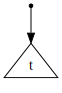

In [13]:
toDotList([One(Tree('t'))])

The class `Two` represents a 2-node of the form $\texttt{Two}(l, k, r)$.  It manages three member variables:
  - `mLeft`  is the left subtree $l$,
  - `mKey`   is the key that is stored at this node,
  - `mRight` is the right subtree $r$.

In [14]:
class Two(TwoThreeTree):
    def __init__(self, left, key, right):
        TwoThreeTree.__init__(self)
        self.mLeft  = left
        self.mKey   = key
        self.mRight = right
        
    def isTwo(self):
        return True

    def __str__(self):
        return self._make_string(['mLeft', 'mKey', 'mRight'])

Graphically, the node $\texttt{Two}(l, k, r)$ is represented as shown below:

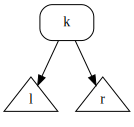

In [15]:
toDotList([Two(Tree('l'), 'k', Tree('r'))])

The class `Three` represents a 3-node of the form $\texttt{Three}(l, k_L, m, k_R, r)$.  It manages 5 member variables:
  - `mLeft`   is the left subtree $l$,
  - `mKeyL`   is the left key $k_L$,
  - `mMiddle` is the middle subtree $m$,
  - `mKeyR`   is the right key $k_r$,
  - `mRight`  is the right subtree.

In [16]:
class Three(TwoThreeTree):
    def __init__(self, left, keyL, middle, keyR, right):
        TwoThreeTree.__init__(self)
        self.mLeft   = left
        self.mKeyL   = keyL
        self.mMiddle = middle
        self.mKeyR   = keyR
        self.mRight  = right

    def __str__(self):
        return self._make_string(['mLeft', 'mKeyL', 'mMiddle', 'mKeyR', 'mRight'])        

    def isThree(self):
        return True

Graphically, the node $\texttt{Three}(l, k_L, m, k_R, r)$ is represented as shown below:

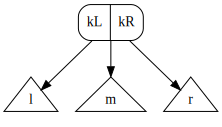

In [17]:
toDotList([Three(Tree('l'), 'kL', Tree('m'), 'kR', Tree('r'))])

The class `Four` represents a 4-node.  It manages 7 member variables:
  - `mLeft`    is the left subtree $l$,
  - `mKeyL`    is the left key $k_L$,
  - `mMiddleL` is the middle left subtree $m_L$,
  - `mKeyM`    is the middle key,
  - `mMiddleR` is the middle right subtree $m_R$,
  - `mKeyR`    is the right key $k_r$,
  - `mRight`   is the right subtree.

In [18]:
class Four(TwoThreeTree):
    def __init__(self, l, kl, ml, km, mr, kr, r):
        TwoThreeTree.__init__(self)
        self.mLeft    = l
        self.mKeyL    = kl
        self.mMiddleL = ml
        self.mKeyM    = km
        self.mMiddleR = mr
        self.mKeyR    = kr
        self.mRight   = r
        
    def __str__(self):
        return self._make_string(['mLeft', 'mKeyL', 'mMiddleL', 'mKeyM', 'mMiddleR', 'mKeyR', 'mRight'])
    
    def isFour(self):
        return True

Graphically, the node $\texttt{Four}(l, k_L, m_L, k_M, m_R, k_R, r)$ is represented as shown below:

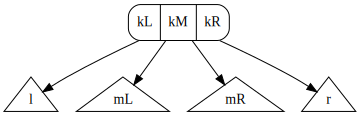

In [19]:
toDotList([Four(Tree('l'), 'kL', Tree('mL'), 'kM', Tree('mR'), 'kR', Tree('r'))])

## Methods of the Class `Nil`

The empty tree does not contain any keys:
$$ \texttt{Nil}.\texttt{member}(k) = \texttt{False} $$

In [20]:
def member(self, k):
    return False

Nil.member = member

Insertings a key $k$ into an empty node returns a 2-node with two empty subtrees.

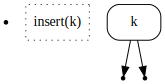

In [21]:
toDotList([Nil(), Method('insert(k)'), Two(Nil(), 'k', Nil())])

Mathematically, this can be written as follows:
$$ \texttt{Nil}.\texttt{ins}(k) = \texttt{Two}(\texttt{Nil}, k, \texttt{Nil}) $$
The implementation is straightforward as shown below.

In [22]:
def _ins(self, k):
    return Two(Nil(), k, Nil())

Nil._ins = _ins

## Methods of the Class Two

The method `extract` returns the member variables stored in a 2-node.  This is usefull to shorten the code since when we use this method, we don't have to prefix all variable names with `self.`.

In [23]:
def _extract(self):
    return self.mLeft, self.mKey, self.mRight

Two._extract = _extract

Given a 2-node $t$ and a key $k$, the method $t.\texttt{member}(k)$ checks whether the key $k$ occurs in $t$.  It is specified as follows:
  - $\texttt{Two}(l,k,r).\texttt{member}(k) = \texttt{True}$,
  - $k_1 < k_2 \rightarrow \texttt{Two}(l,k_1,r).\texttt{member}(k_2) = r.\texttt{member}(k_2)$,
  - $k_1 > k_2 \rightarrow \texttt{Two}(l,k_1,r).\texttt{member}(k_2) = l.\texttt{member}(k_2)$.

In [24]:
def member(self, key):
    l, k, r = self._extract()
    if k == key:
        return True
    elif key < k:
        return l.member(key)
    elif key > self.mKey:
        return r.member(key)

Two.member = member

The method $t.\texttt{ins}(k)$ takes a 2-3 tree $t$ and and a key $k$ and inserts the key $k$ into $t$.
It returns a 2-3-4 tree that has at most one 4-node, which has to be a child of the root
node.  The function $\texttt{ins}$ is recursive and uses the function $\texttt{restore}$ defined below. 

The most important invariant satisfied by the method call $t.\texttt{ins}(k)$ is the fact that the tree
$t.\texttt{ins}(k)$ has the same height as the tree $t$.

The different cases that need to be handled by `ins` are shown graphically below:

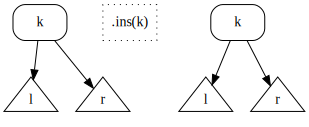

In [25]:
toDotList([Two(Tree('l'), 'k', Tree('r')), Method('.ins(k)'), Two(Tree('l'), 'k', Tree('r')) ])

  - $\displaystyle\texttt{Two}(l,k,r).\texttt{ins}(k) = \texttt{Two}(l,k,r)$

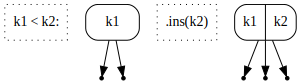

In [26]:
toDotList([Method('k1 < k2:'), Two(Nil(), 'k1', Nil()), Method('.ins(k2)'), Three(Nil(), 'k1', Nil(), 'k2', Nil()) ])

- $k_1 < k_2 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_1,\texttt{Nil},k_2,\texttt{Nil})$

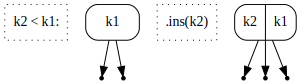

In [27]:
toDotList([Method('k2 < k1:'), Two(Nil(), 'k1', Nil()), Method('.ins(k2)'), Three(Nil(), 'k2', Nil(), 'k1', Nil()) ])

- $k_2 < k_1 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_2,\texttt{Nil},k_1,\texttt{Nil})$

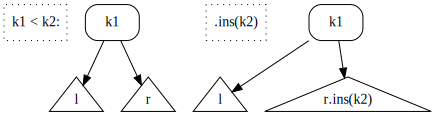

In [28]:
toDotList([Method('k1 < k2:'), Two(Tree('l'), 'k1', Tree('r')), Method('.ins(k2)'), Two(Tree('l'), 'k1', Tree('r.ins(k2)')) ])

- $k_1 < k_2 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l,k_1,r.\texttt{ins}(k)).\texttt{restore}()$

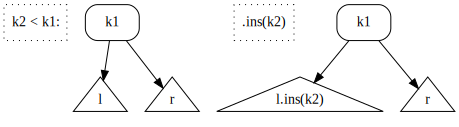

In [29]:
toDotList([Method('k2 < k1:'), Two(Tree('l'), 'k1', Tree('r')), Method('.ins(k2)'), Two(Tree('l.ins(k2)'), 'k1', Tree('r')) ])

- $k_2 < k_1 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l.\texttt{ins}(k),k_1,r).\texttt{restore}()$

I have collected all of these equations below:
  - $\texttt{Two}(l,k,r).\texttt{ins}(k) = \texttt{Two}(l,k,r)$
  - $k_1 < k_2 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_1,\texttt{Nil},k_2,\texttt{Nil})$
  - $k_2 < k_1 \rightarrow \texttt{Two}(\texttt{Nil},k_1,\texttt{Nil}).\texttt{ins}(k_2) = \texttt{Three}(\texttt{Nil},k_2,\texttt{Nil},k_1,\texttt{Nil})$
  - $k_1 < k_2 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l,k_1,r.\texttt{ins}(k)).\texttt{restore}()$
  - $k_2 < k_1 \wedge l \not= \texttt{Nil} \wedge r \not= \texttt{Nil} \rightarrow \texttt{Two}(l,k_1,r).\texttt{ins}(k_2) = \texttt{Two}(l.\texttt{ins}(k),k_1,r).\texttt{restore}()$
  
Using these equations, the implementation of `ins` is straightforward.

In [30]:
def _ins(self, key):
    l, k, r = self._extract()
    if k == key:
        return self
    elif l.isNil() and r.isNil():
        if key < k:
            return Three(Nil(), key, Nil(), k, Nil())
        else:
            return Three(Nil(), k, Nil(), key, Nil())
    elif not l.isNil() and not r.isNil():
        if key < k:
            self.mLeft = l._ins(key)._restore()
        else:
            self.mRight = r._ins(key)._restore()
        return self
    assert False, f'Unbalanced node {self}'
    
Two._ins = _ins

The function call $t.\texttt{restore}()$ takes a 2-3-4 tree $t$ that has at most one 4-node. This 4-node has to be a child
of the root.  It returns a 2-3-4 tree that has at most one 4-node.  This 4-node has to be the root node.
Graphically, it is specified as shown below.

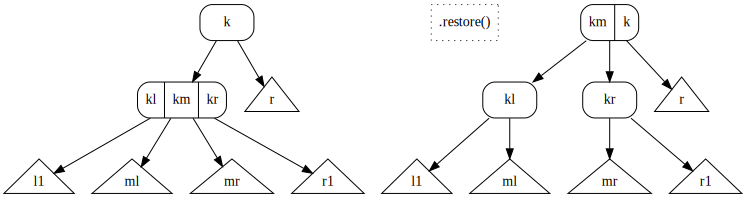

In [31]:
toDotList([Two(Four(Tree('l1'),'kl',Tree('ml'),'km', Tree('mr'),'kr',Tree('r1')), 'k', Tree('r')), 
           Method('.restore()'), 
           Three(Two(Tree('l1'),'kl',Tree('ml')), 'km', Two(Tree('mr'),'kr',Tree('r1')), 'k', Tree('r'))])

 - $\texttt{Two}\bigl(\texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1), k, r\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(\texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1), k, r\bigr) $

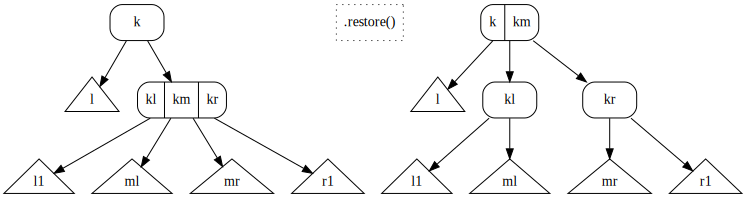

In [32]:
toDotList([Two(Tree('l'), 'k', Four(Tree('l1'),'kl',Tree('ml'),'km', Tree('mr'),'kr',Tree('r1'))), 
           Method('.restore()'), 
           Three(Tree('l'), 'k', Two(Tree('l1'),'kl',Tree('ml')), 'km', Two(Tree('mr'),'kr',Tree('r1')))])

  - $\texttt{Two}\bigl(l, k, \texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1)\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(l, k, \texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1)\bigr) $

I have collected both equations below:
  - $\texttt{Two}\bigl(\texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1), k, r\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(\texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1), k, r\bigr) $,
  - $\texttt{Two}\bigl(l, k, \texttt{Four}(l_1,k_l,m_l,k_m,m_r,k_r,r_1)\bigr).\texttt{restore}() = 
     \texttt{Three}\bigl(l, k, \texttt{Two}(l_1, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r_1)\bigr) $

If neither the left nor the right child node of a 2-node is a 4-node, the node is returned unchanged.  

In [33]:
def _restore(self):
    l, k, r = self._extract()
    if l.isFour():
        l1, kl, ml, km, mr, kr, r1 = l._extract()
        return Three(Two(l1, kl, ml), km, Two(mr, kr, r1), k, r)
    if r.isFour():
        l1, kl, ml, km, mr, kr, r1 = r._extract()
        return Three(l, k, Two( l1, kl, ml), km, Two( mr, kr, r1))
    return self

Two._restore = _restore

## Methods of the Class `Three`

The method `extract` returns the member variables stored in a 3-node.

In [34]:
def _extract(self):
    return self.mLeft, self.mKeyL, self.mMiddle, self.mKeyR, self.mRight

Three._extract = _extract

Given a 3-node $t$ and a key $k$, the method $t.\texttt{member}(k)$ checks whether the key $k$ occurs in $t$.  It is specified as follows:
  - $k = k_l \vee k = k_r \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = \texttt{True}$,
  - $k < k_l \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = l.\texttt{member}(k)$,
  - $k_l < k < k_r \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = m.\texttt{member}(k)$,
  - $k_r < k \rightarrow \texttt{Three}(l,k_l,m,k_r,r).\texttt{member}(k) = r.\texttt{member}(k)$.

In [35]:
def member(self, key):
    l, kL, m, kR, r = self._extract()
    if key == kL or key == kR:
        return True
    if key < kL:
        return l.member(key)
    if kL < key < kR:
        return m.member(key)
    if kR < key:
        return self.mRight.member(key)
    
Three.member = member

The method $t.\texttt{ins}(k)$ takes a 2-3 tree $t$ and and a key $k$ and inserts the key $k$ into $t$.
It returns a 2-3-4 tree that has at most one 4-node, which has to be a child of the root
node.  The function $\texttt{ins}$ is recursive and uses the function $\texttt{restore}$ defined below. 
It is defined as follows:
  - $k = k_l \vee k = k_r \rightarrow\texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}(l,k_l,m,k_r,r)$
  - $k < k_l \rightarrow \texttt{Three}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil}).\texttt{ins}(k) = 
                         \texttt{Four}(\texttt{Nil},k,\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil})$
  - $k_l < k < k_r \rightarrow \texttt{Three}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil}).\texttt{ins}(k) = 
                         \texttt{Four}(\texttt{Nil},k_l,\texttt{Nil},k,\texttt{Nil},k_r,\texttt{Nil})$
  - $k_r < k \rightarrow \texttt{Three}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil}).\texttt{ins}(k) = 
                         \texttt{Four}(\texttt{Nil},k_l,\texttt{Nil},k_r,\texttt{Nil},k,\texttt{Nil})$
  
  - $k < k_l \wedge l \not= \texttt{Nil} \wedge m \not= \texttt{Nil}\wedge r \not= \texttt{Nil} \rightarrow 
     \texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}\bigl(l.\texttt{ins}(k),k_l,m,k_r,r\bigr).\texttt{restore}()$
  - $k_l < k < k_r \wedge l \not= \texttt{Nil} \wedge m \not= \texttt{Nil}\wedge r \not= \texttt{Nil} \rightarrow 
     \texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}\bigl(l,k_l,m.\texttt{ins}(k),k_r,r\bigr).\texttt{restore}()$
  - $k_r < k \wedge l \not= \texttt{Nil} \wedge m \not= \texttt{Nil}\wedge r \not= \texttt{Nil} \rightarrow 
     \texttt{Three}(l,k_l,m,k_r,r).\texttt{ins}(k) = \texttt{Three}\bigl(l,k_l,m,k_r,r.\texttt{ins}(k)\bigr).\texttt{restore}()$

In [36]:
def _ins(self, key):
    l, kL, m, kR, r = self._extract()
    if key == kL or key == kR:
        return self
    if l.isNil() and m.isNil() and r.isNil():
        if key < kL:
            return Four(Nil(), key, Nil(), kL, Nil(), kR, Nil())
        if kL < key < kR:
            return Four(Nil(), kL, Nil(), key, Nil(), kR, Nil())
        if kR < key:
            return Four(Nil(), kL, Nil(), kR, Nil(), key, Nil())
    if not l.isNil() and not m.isNil() and not r.isNil():
        if key < kL:
            self.mLeft = l._ins(key)._restore()
        elif kL < key < kR:
            self.mMiddle = m._ins(key)._restore()
        elif kR < key:
            self.mRight = r._ins(key)._restore()
        return self
    assert False, f'Unbalanced node {self}'
    
Three._ins = _ins

The function call $t.\texttt{restore}()$ takes a 2-3-4 tree $t$ that has at most one 4-node. This 4-node has to be a child
of the root.  It returns a 2-3-4 tree that has at most one 4-node.  This 4-node has to be the root node.

The most important invariant satisfied by the method call $t.\texttt{ins}(k)$ is the fact that the tree
$t.\texttt{ins}(k)$ has the same height as the tree $t$.

The different cases that need to be handled by `ins` are shown graphically below:

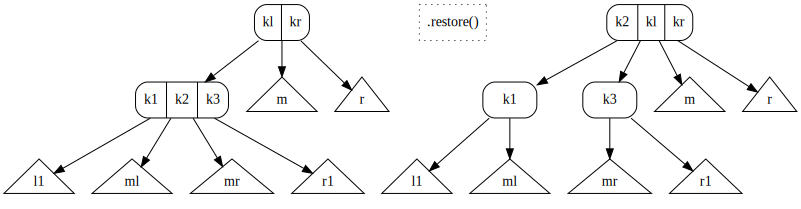

In [37]:
toDotList([Three(Four(Tree('l1'), 'k1', Tree('ml'), 'k2', Tree('mr'), 'k3', Tree('r1')), 'kl', Tree('m'), 'kr', Tree('r')),
           Method('.restore()'),
           Four(Two(Tree('l1'), 'k1', Tree('ml')), 'k2', Two(Tree('mr'), 'k3', Tree('r1')), 'kl', Tree('m'), 'kr', Tree('r')),
          ])

  - $\texttt{Three}\bigl(\texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_l, m, k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(\texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_l, m, k_r, r\bigr) $

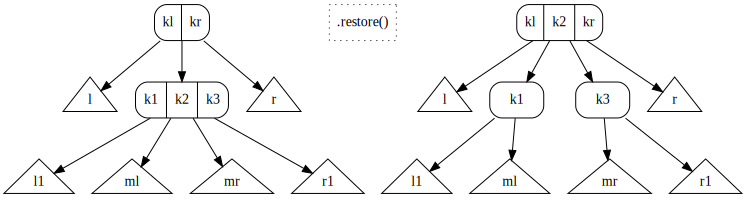

In [38]:
toDotList([Three(Tree('l'), 'kl', Four(Tree('l1'), 'k1', Tree('ml'), 'k2', Tree('mr'), 'k3', Tree('r1')), 'kr', Tree('r')),
           Method('.restore()'),
           Four(Tree('l'), 'kl', Two(Tree('l1'), 'k1', Tree('ml')), 'k2', Two(Tree('mr'), 'k3', Tree('r1')), 'kr', Tree('r'))
          ])

  - $\texttt{Three}\bigl(l, k_l, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_r, r\bigr) $

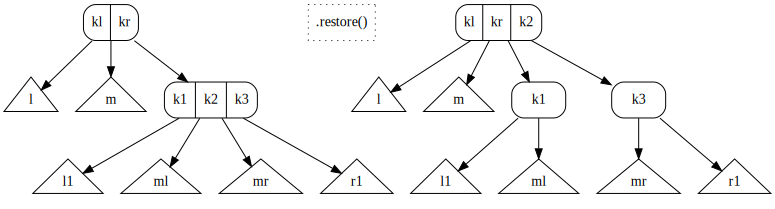

In [39]:
toDotList([Three(Tree('l'), 'kl', Tree('m'), 'kr', Four(Tree('l1'), 'k1', Tree('ml'), 'k2', Tree('mr'), 'k3', Tree('r1'))),
           Method('.restore()'),
           Four(Tree('l'), 'kl', Tree('m'), 'kr', Two(Tree('l1'), 'k1', Tree('ml')), 'k2', Two(Tree('mr'), 'k3', Tree('r1')))
          ])

  - $\texttt{Three}\bigl(l, k_l, m, k_r, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1)\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, m, k_r, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1)\bigr) $

Below I have collected all the equations specifying the implementation of `restore` for 3-nodes.
  - $\texttt{Three}\bigl(\texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_l, m, k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(\texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_l, m, k_r, r\bigr) $
  - $\texttt{Three}\bigl(l, k_l, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1), k_r, r\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1), k_r, r\bigr) $
  - $\texttt{Three}\bigl(l, k_l, m, k_r, \texttt{Four}(l_1,k_1,m_l,k_2,m_r,k_3,r_1)\bigr).\texttt{restore}() = 
     \texttt{Four}\bigl(l, k_l, m, k_r, \texttt{Two}(l_1, k_1, m_l), k_2, \texttt{Two}(m_r, k_3, r_1)\bigr) $
     
If neither of the child nodes of a 3-node is a 4-node, the node is returned unchanged.

In [40]:
def _restore(self):
    l, kl, m, kr, r = self._extract()
    if l.isFour():
        l1, k1, ml, k2, mr, k3, r1 = l._extract()
        return Four(Two(l1, k1, ml), k2, Two( mr, k3, r1), kl, m, kr, r)
    if m.isFour():
        l1, k1, ml, k2, mr, k3, r1 = m._extract()
        return Four(l, kl, Two( l1, k1, ml), k2, Two( mr, k3, r1), kr, r)
    if r.isFour():
        l1, k1, ml, k2, mr, k3, r1 = r._extract()
        return Four(l, kl, m, kr, Two( l1, k1, ml), k2, Two( mr, k3, r1))
    return self

Three._restore = _restore

## Methods of the Class `Four`

The method extract returns the member variables stored in a 4-node.

In [41]:
def _extract(self):
    return self.mLeft, self.mKeyL, self.mMiddleL, self.mKeyM, self.mMiddleR, self.mKeyR, self.mRight 

Four._extract = _extract

The method `restore` returns a 4-node unchanged.

In [42]:
def _restore(self):
    return self

Four._restore = _restore

The function `grow` turns a 4-node into 3 2-nodes.  Graphically, it is specified as follows:

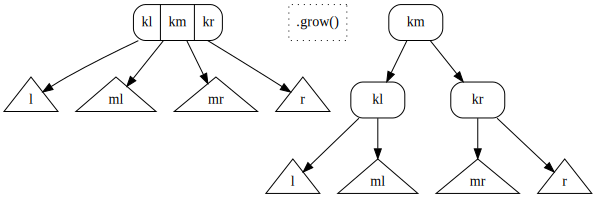

In [43]:
toDotList([Four(Tree('l'),'kl', Tree('ml'), 'km', Tree('mr'), 'kr', Tree('r')),
           Method('.grow()'),
           Two(Two(Tree('l'),'kl', Tree('ml')), 'km', Two(Tree('mr'), 'kr', Tree('r')))
          ])

  - $\texttt{Four}(l, k_l, m_l, k_m, m_r, k_r, r).\texttt{grow}() =  
     \texttt{Two}\bigl(\texttt{Two}(l, k_l, m_l), k_m, \texttt{Two}(m_r, k_r, r)\bigr)$

In [44]:
def _grow(self):
    l, kl, ml, km, mr, kr, r = self._extract()
    return Two(Two(l, kl, ml), km, Two(mr, kr, r))
    
Four._grow = _grow

## Testing

In [45]:
m = Nil()
m.isNil()
m.toDot()

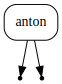

In [46]:
m = m.insert("anton")
m.toDot()

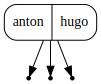

In [47]:
m = m.insert("hugo" )
m.toDot()

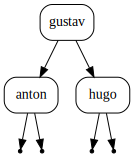

In [48]:
m = m.insert("gustav")
m.toDot()

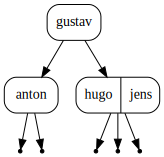

In [49]:
m = m.insert("jens")
m.toDot()

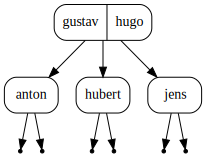

In [50]:
m = m.insert("hubert")
m.toDot()

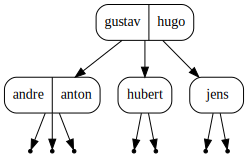

In [51]:
m = m.insert("andre")
m.toDot()

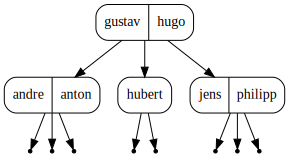

In [52]:
m = m.insert("philipp")
m.toDot()

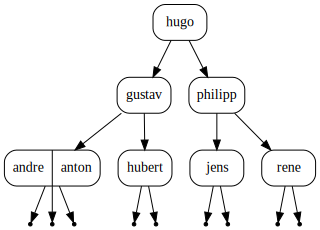

In [53]:
m = m.insert("rene")
m.toDot()

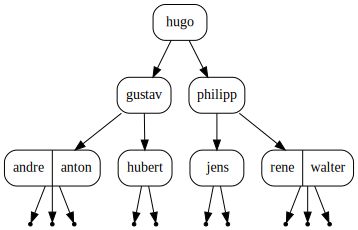

In [54]:
m = m.insert("walter")
m.toDot()

Let's generate 2-3 tree with random keys.

In [55]:
import random as rnd

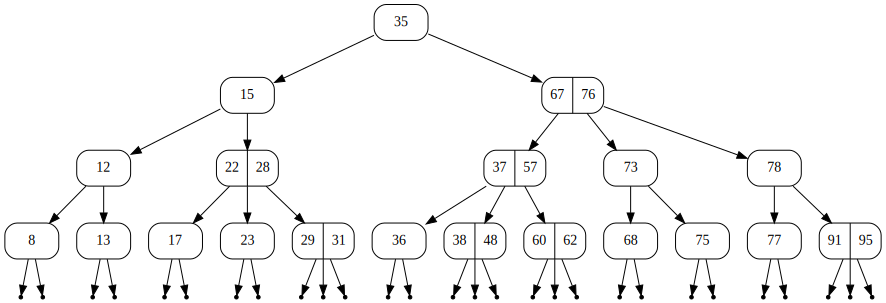

In [56]:
t = Nil()
for k in range(30):
    k = rnd.randrange(100)
    t = t.insert(k)
t.toDot()

Lets us try to create a tree by inserting sorted numbers because that resulted in linear complexity for ordered binary trees.

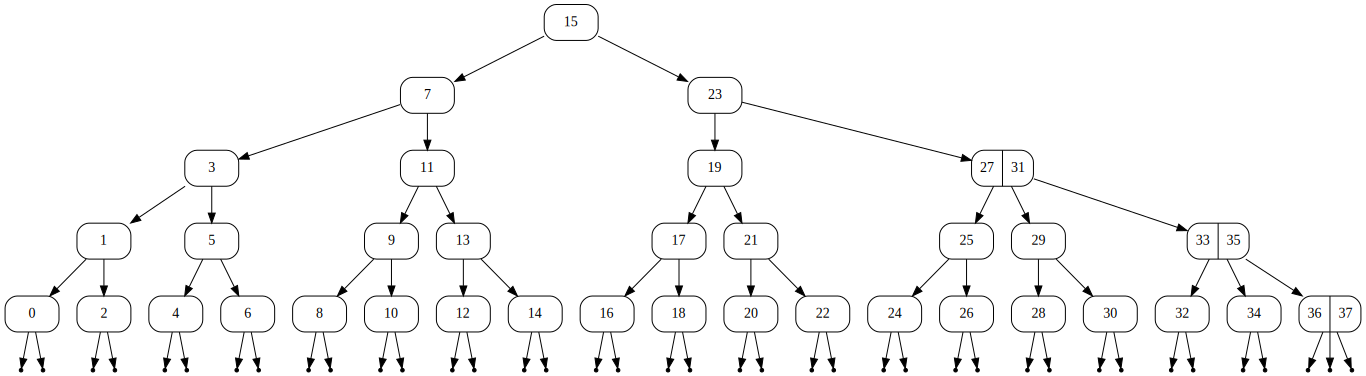

In [57]:
M = Nil()
for k in range(38):
    M = M.insert(k)
M.toDot()

Finally, we compute the set of prime numbers $\leq 100$.  Mathematically, this set is given as follows:
$$ \bigl\{2, \cdots, 100 \bigr\} - \bigl\{ i \cdot j \bigm| i, j \in \{2, \cdots, 100 \}\bigr\}$$
First, we compute the set of products $\bigl\{ i \cdot j \bigm| i, j \in \{2, \cdots, 100 \}\bigr\}$.
Then, we insert all naturals numbers less than 100 that are not products into the set of primes.

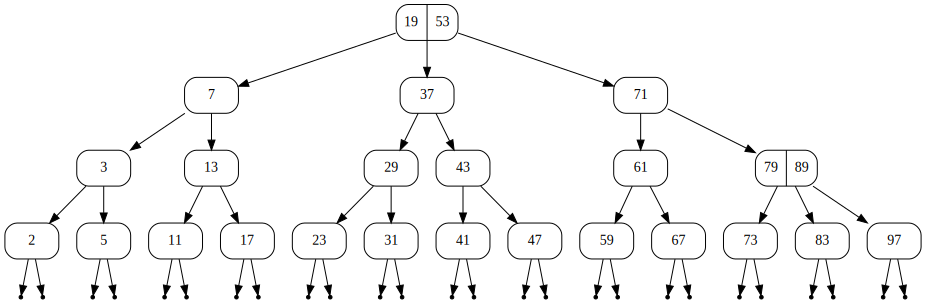

In [58]:
Products = Nil()    
for i in range(2, 101):
    for j in range(2, 101):
        Products = Products.insert(i * j)
        
Primes = Nil()
for k in range(2, 101):
    if not Products.member(k):
        Primes = Primes.insert(k)
Primes.toDot()

## Deletion

The method $t.\texttt{delete}(k)$ is specified as follows:
 - $t.\texttt{delete}(x) = t.\texttt{del}(x).\texttt{repair}().\texttt{shrink}()$
 
This method has already been implemented in he class `TwoThreeTree`.

Below we specify the method `del`.  When $t.\texttt{del}(e)$ is called, $t$ is a 1-2-3 tree containing at most one 1-node.  This 1-node must occur at the root of the tree.  The expression $t.\texttt{del}(e)$ returns the 1-2-3 tree that results from removing the element $e$ from the tree $t$.

The important invariant maintained by `del` is that the trees $t$ and $t.\texttt{del}(k)$ have the same height.

For the class `Nil` the method $t.\texttt{del}(x)$ is specified as follows:
  - $\texttt{Nil}.\texttt{del}(x) = \texttt{Nil}$

In [59]:
def _del(self, x):
    "your code here"

TwoThreeTree._del = _del

For the class `Two` the method `del` is specified as follows:
  - $\texttt{Two}(\texttt{Nil}, k, \texttt{Nil}).\texttt{del}(k) = \texttt{One}(\texttt{Nil})$
  - $k \not= e \rightarrow \texttt{Two}(\texttt{Nil}, k, \texttt{Nil}).\texttt{del}(e) = \texttt{Two}(\texttt{Nil}, k, \texttt{Nil})$

  - $L \not= \texttt{Nil} \wedge R \not= \texttt{Nil} \wedge R.\texttt{delMin}() = \langle R', kM\rangle \rightarrow
     \texttt{Two}(L, k, R).\texttt{del}(k) = \texttt{Two}(L, kM, R').\texttt{repair}()$
  - $e < k \rightarrow
     \texttt{Two}(L, k, R).\texttt{del}(e) = \texttt{Two}(L.\texttt{del}(e), k, R).\texttt{repair}()$
  - $k < e \rightarrow
     \texttt{Two}(L, k, R).\texttt{del}(e) = \texttt{Two}(L, k, R.\texttt{del}(e)).\texttt{repair}()$

In [60]:
def _del(self, e):
    "your code here"
    
Two._del = _del

Below we specify the method `del` for the class `Three`:     
  - $\texttt{Three}(\texttt{Nil}, k_L, \texttt{Nil}, k_R, \texttt{Nil}).\texttt{del}(k_L) = \texttt{Two}(\texttt{Nil}, k_R, \texttt{Nil})$
  - $\texttt{Three}(\texttt{Nil}, k_L, \texttt{Nil}, k_R, \texttt{Nil}).\texttt{del}(k_R) = \texttt{Two}(\texttt{Nil}, k_L, \texttt{Nil})$
  - $k_L \not= e \wedge k_R \not= e \rightarrow
     \texttt{Three}(\texttt{Nil}, k_L, \texttt{Nil}, k_R, \texttt{Nil}).\texttt{del}(e) = \texttt{Three}(\texttt{Nil}, k_L, \texttt{Nil}, k_R, \texttt{Nil})$
     
  - $L \not= \texttt{Nil} \wedge M.\texttt{delMin}() = \langle M', k_M\rangle \rightarrow
     \texttt{Three}(L, k_L, M, k_R, R).\texttt{del}(k_L) = \texttt{Three}(L, k_M, M', k_R, R).\texttt{repair}()$
  - $L \not= \texttt{Nil} \wedge R.\texttt{delMin}() = \langle R', k_M\rangle \rightarrow
     \texttt{Three}(L, k_L, M, k_R, R).\texttt{del}(k_R) = \texttt{Three}(L, k_L, M, k_M, R').\texttt{repair}()$
  - $e < k_L \rightarrow
     \texttt{Three}(L, x, M, y, R).\texttt{del}(e) = \texttt{Three}(L.\texttt{del}(e), k_L, M, k_R, R).\texttt{repair}()$
  - $k_L < e < k_R \rightarrow
     \texttt{Three}(L, k_L, M, k_R, R).\texttt{del}(e) = \texttt{Three}(L, k_L, M.\texttt{del}(e), k_R, R).\texttt{repair}()$
  - $k_R < e \rightarrow
     \texttt{Three}(L, k_L, M, k_R, R).\texttt{del}(e) = \texttt{Three}(L, k_L, M, k_R, R.\texttt{del}(e)).\texttt{repair}()$

In [61]:
def _del(self, e):
    "your code here"
    
Three._del = _del

The method $t.\texttt{delMin}()$ removes the smallest key $k_M$ from the tree $t$ and returns a pair $\langle t', k_M \rangle$
where $t'$ is the tree that results from deleting $k_M$ in $t$.  The nodes $t'$ and $t$ have the same height.

For the class `Two` the method `delMin` is specified via the following equations:
  - $\texttt{Two}(\texttt{Nil}, k, \texttt{Nil}).\texttt{delMin}() = \langle\texttt{One}(\texttt{Nil}), k\rangle$
  - $L \not= \texttt{Nil} \wedge R \not= \texttt{Nil} \wedge L.\texttt{delMin}() = \langle L', k_M\rangle \rightarrow
    \texttt{Two}(L, k, R).\texttt{delMin}() = \langle\texttt{Two}(L', k, R).\texttt{repair}(), k_M \rangle$

In [62]:
def _delMin(self):
    "your code here"
    
Two._delMin = _delMin

For the class `Three` the method `delMin` is specified via the following equations:
  - $\texttt{Three}(\texttt{Nil}, k_L, \texttt{Nil}, k_R, \texttt{Nil}).\texttt{delMin}() = \langle\texttt{Two}(\texttt{Nil}, k_R, \texttt{Nil}), k_L\rangle$
  - $L \not= \texttt{Nil} \wedge M \not= \texttt{Nil} \wedge R \not= \texttt{Nil} \wedge L.\texttt{delMin}() = \langle L', k_M\rangle \rightarrow 
    \texttt{Three}(L, k_L, M, k_R, R).\texttt{delMin}() = \langle\texttt{Three}(L', k_L, M, k_R, R).\texttt{repair}(), k_M\rangle$

In [63]:
def _delMin(self):
    "your code here"  
    
Three._delMin = _delMin

The method $t.\texttt{repair}()$ takes a 1-2-3 tree $t$ that contains at most a single 1-node. 
If the tree $t$ has size $1$, then this 1-node may occur at the root.  Otherwise, the 1-node has to be a child of the root.
The method returns a 1-2-3 tree of the same size as $t$ where the 1-node can only occur at the root.

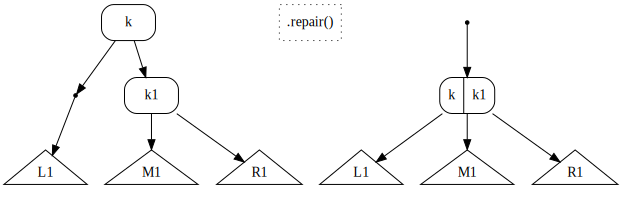

In [64]:
toDotList([Two(One(Tree('L1')), 'k', Two(Tree('M1'), 'k1', Tree('R1'))), Method('.repair()'), One(Three(Tree('L1'), 'k', Tree('M1'), 'k1', Tree('R1')))])

  - $\texttt{Two}(\texttt{One}(L_1), k, \texttt{Two}(M_1, k_1, R_1)).\texttt{repair}() = \texttt{One}(\texttt{Three}(L_1, k, M_1, k_1, R_1))$

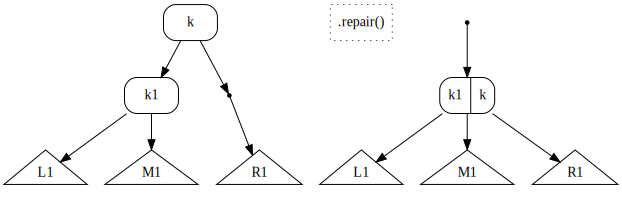

In [65]:
toDotList([Two(Two(Tree('L1'), 'k1', Tree('M1')), 'k', One(Tree('R1'))), Method('.repair()'), One(Three(Tree('L1'), 'k1', Tree('M1'), 'k', Tree('R1')))])

  - $\texttt{Two}(\texttt{Two}(L_1, k_1, M_1), k, \texttt{One}(R_1)).\texttt{repair}() = \texttt{One}(\texttt{Three}(L_1, k_1, M_1, k, R_1))$

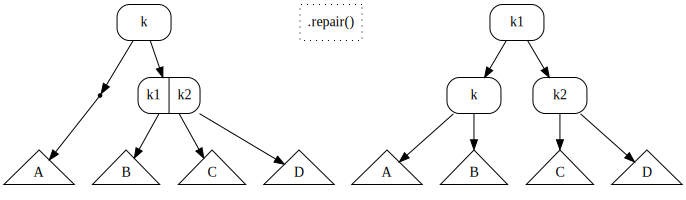

In [66]:
toDotList([Two(One(Tree('A')), 'k', Three(Tree('B'), 'k1', Tree('C'), 'k2', Tree('D'))), 
           Method('.repair()'), 
           Two(Two(Tree('A'), 'k', Tree('B')), 'k1', Two(Tree('C'), 'k2', Tree('D')))
          ])

  - $\texttt{Two}(\texttt{One}(A), k, \texttt{Three}(B, k_1, C, k_2, D)).\texttt{repair}() = \texttt{Two}(\texttt{Two}(A, k, B), k_1, \texttt{Two}(C, k_2, D))$

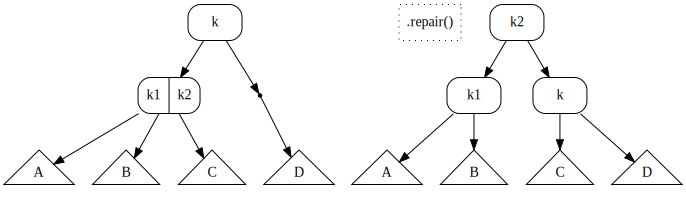

In [67]:
toDotList([Two(Three(Tree('A'), 'k1', Tree('B'), 'k2', Tree('C')), 'k', One(Tree('D'))), 
           Method('.repair()'), 
           Two(Two(Tree('A'), 'k1', Tree('B')), 'k2', Two(Tree('C'), 'k', Tree('D')))
          ])

  - $\texttt{Two}(\texttt{Three}(A, k_1, B, k_2, C), k, \texttt{One}(D)).\texttt{repair}() = \texttt{Two}(\texttt{Two}(A, k_1, B), k_2, \texttt{Two}(C, k, D))$

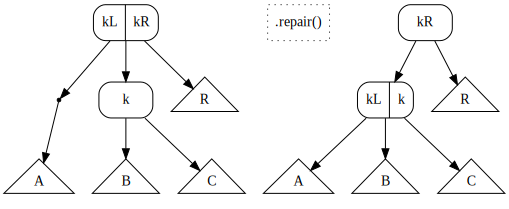

In [68]:
toDotList([Three(One(Tree('A')), 'kL', Two(Tree('B'), 'k', Tree('C')), 'kR', Tree('R')), 
           Method('.repair()'), 
           Two(Three(Tree('A'), 'kL', Tree('B'), 'k', Tree('C')), 'kR', Tree('R'))
          ])

  - $\texttt{Three}(\texttt{One}(A), k_L, \texttt{Two}(B, k, C), k_R, R).\texttt{repair}() = \texttt{Two}(\texttt{Three}(A, k_L, B, k, C), k_R, R)$

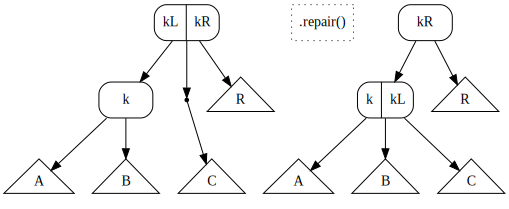

In [69]:
toDotList([Three(Two(Tree('A'), 'k', Tree('B')), 'kL', One(Tree('C')), 'kR', Tree('R')), 
           Method('.repair()'), 
           Two(Three(Tree('A'), 'k', Tree('B'), 'kL', Tree('C')), 'kR', Tree('R'))
          ])

  - $\texttt{Three}(\texttt{Two}(A, k, B), k_L, \texttt{One}(C), k_R, R).\texttt{repair}() = \texttt{Two}(\texttt{Three}(A, k, B, k_L, C), k_R, R)$

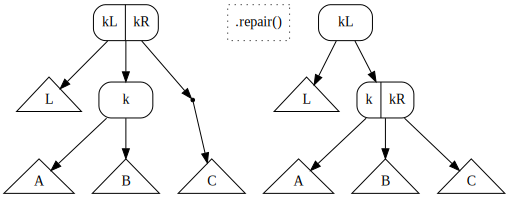

In [70]:
toDotList([Three(Tree('L'), 'kL', Two(Tree('A'), 'k', Tree('B')), 'kR', One(Tree('C'))), 
           Method('.repair()'), 
           Two(Tree('L'), 'kL', Three(Tree('A'), 'k', Tree('B'), 'kR', Tree('C')))
          ])

  - $\texttt{Three}(L, k_L, \texttt{Two}(A, k, B), k_R, \texttt{One}(C)).\texttt{repair}() = \texttt{Two}(L, k_L, \texttt{Three}(A, k, B, k_R, C))$

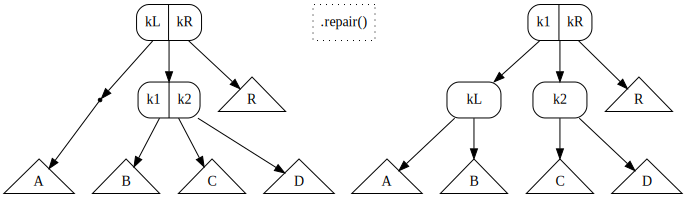

In [71]:
toDotList([Three(One(Tree('A')), 'kL', Three(Tree('B'), 'k1', Tree('C'), 'k2', Tree('D')), 'kR', Tree('R')), 
           Method('.repair()'), 
           Three(Two(Tree('A'), 'kL', Tree('B')), 'k1', Two(Tree('C'), 'k2', Tree('D')), 'kR', Tree('R'))
          ])

  - $\texttt{Three}(\texttt{One}(A), k_L, \texttt{Three}(B, k_1, C, k_2, D), k_R, R).\texttt{repair}() =
     \texttt{Three}(\texttt{Two}(A, k_L, B), k_1, \texttt{Two}(C, k_2, D), k_R, R)$

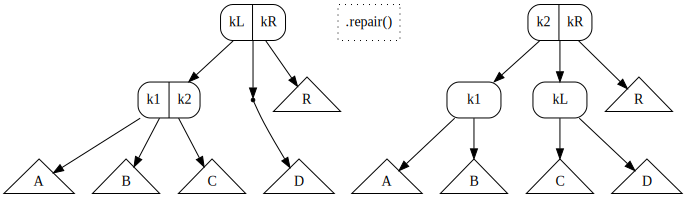

In [72]:
toDotList([Three(Three(Tree('A'), 'k1', Tree('B'), 'k2', Tree('C')), 'kL', One(Tree('D')), 'kR', Tree('R')), 
           Method('.repair()'), 
           Three(Two(Tree('A'), 'k1', Tree('B')), 'k2', Two(Tree('C'), 'kL', Tree('D')), 'kR', Tree('R'))
          ])

  - $\texttt{Three}(\texttt{Three}(A, k_1, B, k_2, C), k_L, \texttt{One}(D), k_R, R).\texttt{repair}() =
     \texttt{Three}(\texttt{Two}(A, k_1, B), k_2, \texttt{Two}(C, k_L, D), k_R, R)$

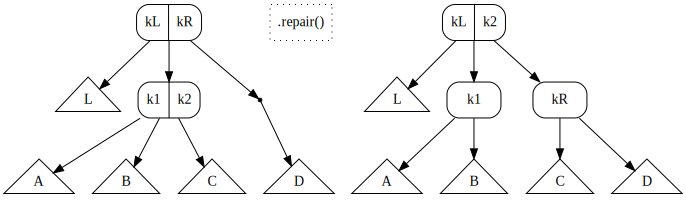

In [73]:
toDotList([Three(Tree('L'), 'kL', Three(Tree('A'), 'k1', Tree('B'), 'k2', Tree('C')), 'kR', One(Tree('D'))), 
           Method('.repair()'), 
           Three(Tree('L'), 'kL', Two(Tree('A'), 'k1', Tree('B')), 'k2', Two(Tree('C'), 'kR', Tree('D')))])

  - $\texttt{Three}(L, k_L, \texttt{Three}(A, k_1, B, k_2, C), k_R, \texttt{One}(D)).\texttt{repair}() =
     \texttt{Three}(L, k_L, \texttt{Two}(A, k_1, B), k_2, \texttt{Two}(C, k_R, D))$    

The equation specifying the method `repair`for the class `Nil`is:

  - $\texttt{Nil}.\texttt{repair}() = \texttt{Nil}$

In [74]:
def _repair(self):
    "your code here"

Nil._repair = _repair

The equation specifying the method `repair` for the class `One` is:

  - $\texttt{One}(t).\texttt{repair}() = \texttt{One}(t)$

In [75]:
def _repair(self):
    "your code here"

One._repair = _repair

The equations specifying the method `repair` for the class `Two` are:
  - $\texttt{Two}(\texttt{Nil}, k, \texttt{Nil}).\texttt{repair}() = \texttt{Two}(\texttt{Nil}, k, \texttt{Nil})$
  - $\texttt{Two}(\texttt{One}(L_1), k, \texttt{Two}(M_1, k_1, R_1)).\texttt{repair}() = \texttt{One}(\texttt{Three}(L_1, k, M_1, k_1, R_1))$
  - $\texttt{Two}(\texttt{Two}(L_1, k_1, M_1), k, \texttt{One}(R_1)).\texttt{repair}() = \texttt{One}(\texttt{Three}(L_1, k_1, M_1, k, R_1))$

  - $\texttt{Two}(\texttt{One}(A), k, \texttt{Three}(B, k_1, C, k_2, D)).\texttt{repair}() = \texttt{Two}(\texttt{Two}(A, k, B), k_1, \texttt{Two}(C, k_2, D))$
  - $\texttt{Two}(\texttt{Three}(A, k_1, B, k_2, C), k, \texttt{One}(D)).\texttt{repair}() = \texttt{Two}(\texttt{Two}(A, k_1, B), k_2, \texttt{Two}(C, k, D))$

In [76]:
def _repair(self):
    "your code here"

Two._repair = _repair

The equations specifying the method `repair` for the class `Three`:
  - $\texttt{Three}(\texttt{Nil}, k_L, \texttt{Nil}, k_R, \texttt{Nil}).\texttt{repair}() = \texttt{Three}(\texttt{Nil}, k_L, \texttt{Nil}, k_R, \texttt{Nil})$
  - $\texttt{Three}(\texttt{One}(A), k_L, \texttt{Two}(B, k, C), k_R, R).\texttt{repair}() = \texttt{Two}(\texttt{Three}(A, k_L, B, k, C), k_R, R)$
  - $\texttt{Three}(\texttt{Two}(A, k, B), k_L, \texttt{One}(C), k_R, R).\texttt{repair}() = \texttt{Two}(\texttt{Three}(A, k, B, k_L, C), k_R, R)$
  - $\texttt{Three}(L, k_L, \texttt{Two}(A, k, B), k_R, \texttt{One}(C)).\texttt{repair}() = \texttt{Two}(L, k_L, \texttt{Three}(A, k, B, k_R, C))$

  - $\texttt{Three}(\texttt{One}(A), k_L, \texttt{Three}(B, k_1, C, k_2, D), k_R, R).\texttt{repair}() =
     \texttt{Three}(\texttt{Two}(A, k_L, B), k_1, \texttt{Two}(C, k_2, D), k_R, R)$
  - $\texttt{Three}(\texttt{Three}(A, k_1, B, k_2, C), k_L, \texttt{One}(D), k_R, R).\texttt{repair}() =
     \texttt{Three}(\texttt{Two}(A, k_1, B), k_2, \texttt{Two}(C, k_L, D), k_R, R)$
  - $\texttt{Three}(L, k_L, \texttt{Three}(A, k_1, B, k_2, C), k_R, \texttt{One}(D)).\texttt{repair}() =
     \texttt{Three}(L, k_L, \texttt{Two}(A, k_1, B), k_2, \texttt{Two}(C, k_R, D))$    

In [77]:
def _repair(self):
    "your code here"

Three._repair = _repair

Finally, we specify the method `shrink`.  The only class where the implementation of `shrink` is nontrivial is the class `One`.

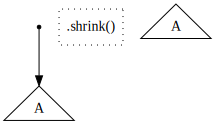

In [78]:
toDotList([One(Tree('A')), Method('.shrink()'), Tree('A')])

$\texttt{One}(A).\texttt{shrink}() = A$

In [ ]:
def _shrink(self):
    return self.mChild

One._shrink = _shrink

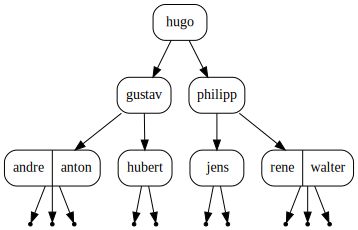

In [79]:
m.toDot()

In [ ]:
m = m.delete('hugo')
m.toDot()

In [ ]:
m = m.delete('walter')
m.toDot()

In [ ]:
m = m.delete('hubert')
m.toDot()

In [ ]:
m = m.delete('anton')
m.toDot()

In [ ]:
m = m.delete('jens')
m.toDot()

In [ ]:
m = m.delete('rene')
m.toDot()

In [ ]:
m = m.delete('gustav')
m.toDot()

In [ ]:
m = m.delete('andre')
m.toDot()

In [ ]:
m = m.delete('philipp')
m.toDot()

In [ ]:
Primes = Nil()
for k in range(2, 101):
    Primes = Primes.insert(k)
Primes.toDot()

In [ ]:
for i in range(2, 101):
    for j in range(2, 101):
        Primes = Primes.delete(i * j)
        
Primes.toDot()